In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
from utility import util
import numpy as np
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

colors = ap.COLORS

region="TWP"


# Plot spatiotemporal mean of OLR and IWP

In [2]:
models_rlt = ["ICONr0.1deg", "ARPr0.1deg", "SAMr0.1deg", "SCREAMr0.1deg", "IFS"]
models_rlut = ["GEOSr0.1deg", "NICAM", "SHiELDr0.1deg", "UM"]
olr_means = {}
print("DYAMOND2...")
for m in models_rlt:
    print("\t",m,"rlt")
    olr_means[m] = (xr.open_dataset(ap.get_file(m, region, "rlt")))["rlt"].mean()
for m in models_rlut:
    print("\t",m,"rlut")
    olr_means[m] = xr.open_dataset(ap.get_file(m, region, "rlut"))["rlut"].mean()
print("...done.\n\nDYAMOND1...")
models1_rlt = ["NICAM","FV3","ICON","SAM","IFS","MPAS","ARP","UM","GEOS"]
olr1_means = {}
for m in models1_rlt:
    print("\t",m,"rlt")
    olr1_means[m] = xr.open_dataset(ap.get_dyamond1(m))["rlt"].mean()
print("...done.")


DYAMOND2...
	 ICONr0.1deg rlt
	 ARPr0.1deg rlt
	 SAMr0.1deg rlt
	 SCREAMr0.1deg rlt
	 IFS rlt
	 GEOSr0.1deg rlut
	 NICAM rlut
	 SHiELDr0.1deg rlut
	 UM rlut
...done.

DYAMOND1...
	 NICAM rlt
	 FV3 rlt
	 ICON rlt
	 SAM rlt
	 IFS rlt
	 MPAS rlt
	 ARP rlt
	 UM rlt
	 GEOS rlt
...done.


In [3]:
olr_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_1H)["adj_atmos_lw_up_all_toa_1h"].mean()
olr1_means["OBS"] = xr.open_dataset(ap.CERES_SYN1_DY1)["olrtoa_all"].mean()

In [4]:
olr_means, olr1_means

({'ICONr0.1deg': <xarray.DataArray 'rlt' ()>
  array(237.69278, dtype=float32),
  'ARPr0.1deg': <xarray.DataArray 'rlt' ()>
  array(247.91003, dtype=float32),
  'SAMr0.1deg': <xarray.DataArray 'rlt' ()>
  array(232.756, dtype=float32),
  'SCREAMr0.1deg': <xarray.DataArray 'rlt' ()>
  array(245.47029, dtype=float32),
  'IFS': <xarray.DataArray 'rlt' ()>
  array(240.2795, dtype=float32),
  'GEOSr0.1deg': <xarray.DataArray 'rlut' ()>
  array(223.22758, dtype=float32),
  'NICAM': <xarray.DataArray 'rlut' ()>
  array(216.49577, dtype=float32),
  'SHiELDr0.1deg': <xarray.DataArray 'rlut' ()>
  array(219.1253, dtype=float32),
  'UM': <xarray.DataArray 'rlut' ()>
  array(199.58702, dtype=float32),
  'OBS': <xarray.DataArray 'adj_atmos_lw_up_all_toa_1h' ()>
  array(222.83421, dtype=float32)},
 {'NICAM': <xarray.DataArray 'rlt' ()>
  array(210.18744, dtype=float32),
  'FV3': <xarray.DataArray 'rlt' ()>
  array(236.28833, dtype=float32),
  'ICON': <xarray.DataArray 'rlt' ()>
  array(247.03989, dt

OBS OBS
NICAM NICAM
SHiELDr0.1deg FV3
ICONr0.1deg ICON
SAMr0.1deg SAM
IFS IFS
None MPAS
ARPr0.1deg ARP
UM UM
SCREAMr0.1deg None
GEOSr0.1deg GEOS


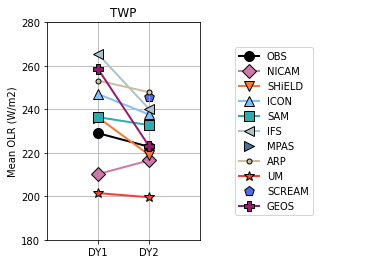

In [30]:
plot_models = ["OBS", "NICAM", "SHiELDr0.1deg", "ICONr0.1deg", "SAMr0.1deg", "IFS", None, 
               "ARPr0.1deg","UM","SCREAMr0.1deg", "GEOSr0.1deg"]
plot1_models = ["OBS", "NICAM", "FV3", "ICON", "SAM", "IFS", "MPAS", 
               "ARP","UM",None, "GEOS"]
markers=['o','D','v','^','s','<','>','.','*','p','P']
fig, [ax,leg] = plt.subplots(1,2, figsize=(6,4))
for i in range(len(plot_models)):
    print(plot_models[i], plot1_models[i])
    if plot_models[i] is not None:
        model_name = plot_models[i].split("r")[0]
        if plot1_models[i] is not None:
            ax.plot([2,1],[olr_means[plot_models[i]],olr1_means[plot1_models[i]]], 
                    marker=markers[i], markersize=10, linewidth=2, mec='k', 
                    color=colors[model_name], label=model_name)
        else:
            ax.scatter([2],[olr_means[plot_models[i]]], 
                       marker=markers[i], s=100, c=colors[model_name], edgecolors='k', label=model_name)
    else:
        model_name = plot1_models[i]
        ax.scatter([1],[olr1_means[plot1_models[i]]], 
                   marker=markers[i], s=100, c=colors[model_name], edgecolors='k', label=model_name)
    
ax.set_ylim([180,280])
ax.grid()
ax.set_xlim([0,3])
ax.set_xticks([1,2])
ax.set_xticklabels(["DY1","DY2"])
ax.set_ylabel("Mean OLR (W/m2)")
ax.set_title("TWP")

h, l = ax.get_legend_handles_labels()
leg.legend(h, l, loc=6)
leg.axis("off")

plt.savefig("../plots/TWP/mean_OLR.png",transparent=True)
plt.show()
